In [94]:
!"C:/Users/alex/AppData/Local/Programs/Python/Python312/python.exe" -m pip install sacrebleu

zsh:1: no such file or directory: C:/Users/alex/AppData/Local/Programs/Python/Python312/python.exe


In [95]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
import torch
import torch.nn as nn
import pandas as pd
import sentencepiece
from tqdm import tqdm
import comet_ml
import sacrebleu
from torch.utils.data import DataLoader

In [97]:
from dataset import WordTokenizer, TextDataset

In [98]:
tokenizer_en = WordTokenizer().fit("data/train.de-en.en")
tokenizer_de = WordTokenizer().fit("data/train.de-en.de")

In [99]:
dataset = TextDataset("data/train.de-en.de", "data/train.de-en.en")

In [131]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_data, _ = train_test_split(dataset, test_size=0.7)

In [100]:
from model import LanguageModel

In [ ]:
loader = DataLoader(dataset, 64, True)

In [ ]:
model = LanguageModel(dataset, embed_size=64, hidden_size=64, rnn_layers=5)

In [ ]:
model.to("cuda")

LanguageModel(
  (embedding_en): Embedding(19065, 64, padding_idx=0)
  (embedding_de): Embedding(25408, 64, padding_idx=0)
  (rnn_encoder): RNN(64, 64, num_layers=3, batch_first=True)
  (rnn_decoder): RNN(128, 64, num_layers=3, batch_first=True)
  (linear): Linear(in_features=64, out_features=19065, bias=True)
)

In [105]:
from train import train

In [120]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Всего параметров: {total_params:,}")

Всего параметров: 4,139,513


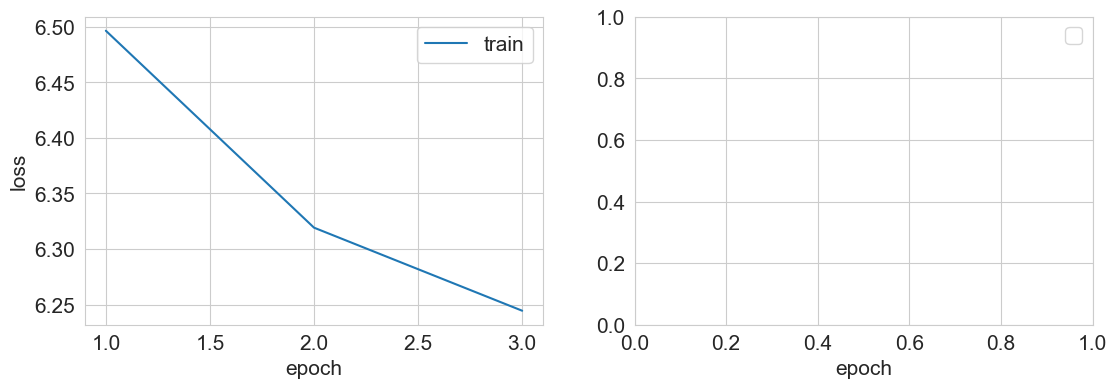

Generation examples:
Doich: <bos> die <unk> männer , die sie sich vorstellen können .
 <eos>                                                                                                                    
torch.Size([1, 1, 64])
Eng: modern who relevant the away are money " named in that so we everything fed .

_________________________________________________________________________


Training 4/30:  40%|████      | 369/919 [01:06<01:39,  5.53it/s]


KeyboardInterrupt: 

In [143]:
optimizer = torch.optim.Adam(model.parameters(), 1e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 30)
   
train(model, optimizer, train_loader=loader, scheduler=scheduler, val_loader=loader, num_epochs=30)